In [1]:
import tensorflow as tf

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

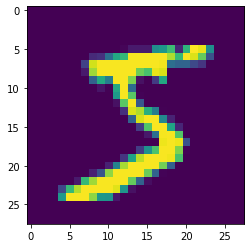

In [9]:
plt.imshow(x_train[0])

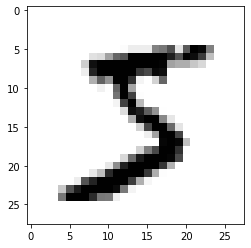

In [10]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [11]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [12]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

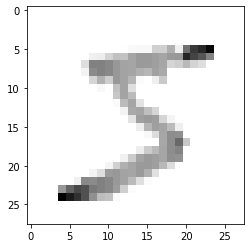

In [13]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [14]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
x_train=np.array(x_train).reshape(-1,28,28,1)
x_test=np.array(x_test).reshape(-1,28,28,1)

In [16]:
x_train.shape

(60000, 28, 28, 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [18]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [21]:
model.fit(x_train,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 59s 43ms/step - loss: 0.3300 - accuracy: 0.8967 - val_loss: 0.1129 - val_accuracy: 0.9658
Epoch 2/5
1313/1313 [==============================] - 59s 45ms/step - loss: 0.1076 - accuracy: 0.9673 - val_loss: 0.1043 - val_accuracy: 0.9684
Epoch 3/5
1313/1313 [==============================] - 57s 43ms/step - loss: 0.0784 - accuracy: 0.9762 - val_loss: 0.0775 - val_accuracy: 0.9756
Epoch 4/5
1313/1313 [==============================] - 58s 44ms/step - loss: 0.0602 - accuracy: 0.9820 - val_loss: 0.0722 - val_accuracy: 0.9776
Epoch 5/5
1313/1313 [==============================] - 59s 45ms/step - loss: 0.0501 - accuracy: 0.9845 - val_loss: 0.0657 - val_accuracy: 0.9796


In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06218470633029938
Test accuracy: 0.9812999963760376


In [23]:
model.save('mnist.h5')

In [24]:
import cv2

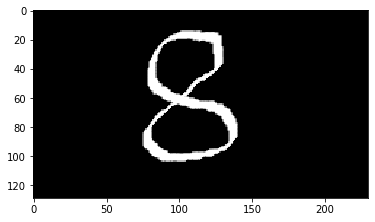

In [42]:
img = cv2.imread('eight.png')
plt.imshow(img,cmap=plt.cm.binary)

In [43]:
img = cv2.imread('eight.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)
img = tf.keras.utils.normalize(img, axis=1)
img = np.array(img).reshape(-1,28,28,1)
p = model.predict(img)

In [44]:
p

array([[1.8154212e-08, 1.6035131e-08, 1.6538469e-07, 6.8346871e-08,
        1.4749554e-07, 1.1875015e-03, 7.0291746e-05, 3.6236160e-11,
        9.9873668e-01, 5.1507550e-06]], dtype=float32)

In [45]:
np.argmax(p)

8